# 데이터 확인

## 데이터 확인_CreDB_card

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rc('font',family = 'Noto Sans CJK JP')

In [155]:
import pandas as pd
print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 100)

pandas version:  1.2.4


In [156]:
df1 = pd.read_csv('./CreDB_card.csv', encoding = 'cp949')
df1.head()

,chaju_id,com_id,sector_cd,sector,check_ym,card_cd,card_type,card_ym,flag_priv_biz_cd
0,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),202008,신용카드(0081),개인카드(1),200206,N
1,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),202011,신용카드(0081),개인카드(1),200206,N
2,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),201903,신용카드(0081),개인카드(1),200206,N
3,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),202002,신용카드(0081),개인카드(1),200206,N
4,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),201904,신용카드(0081),개인카드(1),200206,N


In [136]:
n = df1[df1['sector_cd'] == 'S05']
n

,chaju_id,com_id,sector_cd,sector,check_ym,card_cd,card_type,card_ym,flag_priv_biz_cd
49,C-1001,S05-01001,S05,신용카드사(S05),201907,신용카드(0081),개인카드(1),201307,N
50,C-1001,S05-01001,S05,신용카드사(S05),201901,신용카드(0081),개인카드(1),201307,N
51,C-1001,S05-01001,S05,신용카드사(S05),202010,신용카드(0081),개인카드(1),201307,N
52,C-1001,S05-01001,S05,신용카드사(S05),202002,신용카드(0081),개인카드(1),201307,N
53,C-1001,S05-01001,S05,신용카드사(S05),201904,신용카드(0081),개인카드(1),201307,N
...,...,...,...,...,...,...,...,...,...
96823,C-3000,S05-01017,S05,신용카드사(S05),201904,신용카드(0081),개인카드(1),201506,N
96824,C-3000,S05-01017,S05,신용카드사(S05),201903,신용카드(0081),개인카드(1),201506,N
96825,C-3000,S05-01017,S05,신용카드사(S05),201902,신용카드(0081),개인카드(1),201506,N
96826,C-3000,S05-01017,S05,신용카드사(S05),201901,신용카드(0081),개인카드(1),201506,N


<AxesSubplot:xlabel='com_id', ylabel='count'>

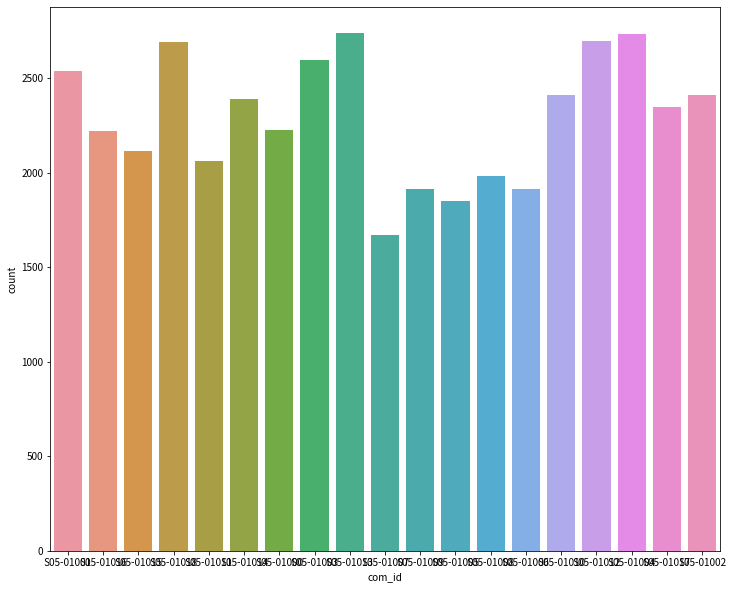

In [157]:
plt.figure(figsize = (12,10))
sns.countplot(x = n['com_id'] ,data = n)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96828 entries, 0 to 96827
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   chaju_id          96828 non-null  object
 1   com_id            96828 non-null  object
 2   sector_cd         96828 non-null  object
 3   sector            96828 non-null  object
 4   check_ym          96828 non-null  int64 
 5   card_cd           96828 non-null  object
 6   card_type         96828 non-null  object
 7   card_ym           96828 non-null  int64 
 8   flag_priv_biz_cd  96828 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.6+ MB


In [6]:
df1.describe()

,check_ym,card_ym
count,96828.000000,96828.000000
mean,201950.787572,201180.023330
std,56.667939,627.224725
min,201812.000000,199712.000000
25%,201906.000000,200801.000000
50%,201912.000000,201312.000000
75%,202006.000000,201707.000000
max,202012.000000,202012.000000


In [7]:
df1.isnull().sum()

chaju_id            0
com_id              0
sector_cd           0
sector              0
check_ym            0
card_cd             0
card_type           0
card_ym             0
flag_priv_biz_cd    0
dtype: int64

### 변수 내용 확인

In [54]:
# 발급기관 id
# S하위 숫자 - 업권코드
# - 이후 숫자 : 확인 필요
df1['com_id'].value_counts()

S05-01013    2738
S05-01004    2731
S05-01012    2695
S05-01018    2691
S05-01003    2594
             ... 
S03-01150      25
S03-01122      25
S03-01166      25
S03-01178      10
S03-01021       2
Name: com_id, Length: 235, dtype: int64

In [55]:
# 업권 코드
# 신용카드사, 은행, 상호금융만 존재
df1['sector_cd'].value_counts()

S05    43492
S01    30560
S03    22776
Name: sector_cd, dtype: int64

In [63]:
# 업권
df1['sector'].value_counts()

신용카드사(S05)              43492
은행(S01)                 30560
상호금융-농협/수협/금고 등(S03)    22776
Name: sector, dtype: int64

In [68]:
# 기준년월(카드)
# 201812 ~ 202012
# df1['check_ym'].value_counts()
df1['check_ym'].unique()

array([202008, 202011, 201903, 202002, 201904, 201812, 201907, 201909,
       202004, 201901, 201902, 202006, 202003, 201912, 202005, 202010,
       202007, 201911, 201905, 201906, 202001, 202009, 201908, 201910,
       202012])

In [69]:
# 카드 종류
# 신용카드, 신용 쳌크카드
df1['card_cd'].value_counts()

신용카드(0081)      93688
신용체크카드(0083)     3140
Name: card_cd, dtype: int64

In [70]:
# 가드 형태
df1['card_type'].value_counts()

개인카드(1)      93170
개인기업카드(2)     3658
Name: card_type, dtype: int64

In [72]:
df1['card_ym'].unique()

array([200206, 201512, 201307, 201711, 201409, 201902, 202010, 201708,
       201608, 201610, 201107, 200107, 200803, 199901, 201712, 202011,
       202008, 201205, 201306, 201705, 201308, 201908, 201312, 201802,
       200812, 200904, 201106, 201010, 201206, 201806, 201909, 201406,
       201208, 200912, 200212, 201812, 201901, 201111, 201510, 201109,
       201710, 201912, 201810, 202002, 201009, 200605, 202004, 201905,
       200909, 201405, 200901, 200312, 200710, 201511, 200902, 202007,
       201506, 201112, 201605, 200009, 201907, 201804, 199906, 202003,
       201702, 201801, 201309, 200511, 201707, 201606, 201612, 201703,
       201808, 201706, 201701, 201807, 201906, 201404, 200903, 199805,
       200411, 201602, 201803, 201611, 201412, 200503, 200806, 200304,
       200705, 201303, 200006, 201509, 201809, 200402, 199811, 200609,
       200712, 201910, 200101, 201211, 200202, 201408, 201507, 202006,
       201201, 202001, 200703, 202009, 200311, 201002, 200412, 201304,
      

In [73]:
# 개인 사업자 여부
df1['flag_priv_biz_cd'].value_counts()

N    93170
Y     3658
Name: flag_priv_biz_cd, dtype: int64

In [98]:
df1[(df1['card_cd'] == '신용체크카드(0083)') & (df1['card_type'] == '개인기업카드(2)')]

,chaju_id,com_id,sector_cd,sector,check_ym,card_cd,card_type,card_ym,flag_priv_biz_cd
13197,C-1266,S05-01011,S05,신용카드사(S05),201908,신용체크카드(0083),개인기업카드(2),201401,Y
13198,C-1266,S05-01011,S05,신용카드사(S05),201907,신용체크카드(0083),개인기업카드(2),201401,Y
13201,C-1266,S05-01011,S05,신용카드사(S05),201906,신용체크카드(0083),개인기업카드(2),201401,Y
13204,C-1266,S05-01011,S05,신용카드사(S05),201904,신용체크카드(0083),개인기업카드(2),201401,Y
13206,C-1266,S05-01011,S05,신용카드사(S05),201903,신용체크카드(0083),개인기업카드(2),201401,Y
13211,C-1266,S05-01011,S05,신용카드사(S05),201901,신용체크카드(0083),개인기업카드(2),201401,Y
13212,C-1266,S05-01011,S05,신용카드사(S05),201902,신용체크카드(0083),개인기업카드(2),201401,Y
13214,C-1266,S05-01011,S05,신용카드사(S05),201812,신용체크카드(0083),개인기업카드(2),201401,Y
13215,C-1266,S05-01011,S05,신용카드사(S05),201905,신용체크카드(0083),개인기업카드(2),201401,Y
19272,C-1384,S05-01000,S05,신용카드사(S05),202011,신용체크카드(0083),개인기업카드(2),201303,Y


## 데이터 확인 CreDB_chaju

In [144]:
df2 = pd.read_csv('./CreDB_chaju.CSV', encoding = 'cp949')
df2.head()

,chaju_id,credit_class,score_risk,gender,age,agegroup,job,edu,dwell_type,house_type,marriage,income_home_grp,income_ind_grp,expenditure_grp,child_cd,no_child,flag_priv_biz_cd
0,C-1001,C05,478,남성,30,30대,기능/노무직,대학교 졸업,자가,아파트,미혼,900-999만원,300-399만원,100-199만원,Y,0,N
1,C-1002,C05,484,여성,66,60대,전업주부,초등학교 졸업,자가,아파트,기혼,200-299만원,모름/무응답,99만원 이하,N,3,Y
2,C-1003,C05,478,남성,43,40대,판매/서비스직,대학교 졸업,자가,아파트,기혼,500-599만원,500-599만원,100-199만원,N,2,N
3,C-1004,C05,445,남성,28,20대,무직/기타,대학교 졸업,자가,아파트,미혼,500-599만원,모름/무응답,99만원 이하,Y,0,N
4,C-1005,C05,421,남성,52,50대,행정관리/전문직,대학교 졸업,자가,아파트,기혼,500-599만원,500-599만원,200-299만원,N,2,N


In [132]:
alone = df2[df2['flag_priv_biz_cd'] == 'Y']

<AxesSubplot:xlabel='job', ylabel='count'>

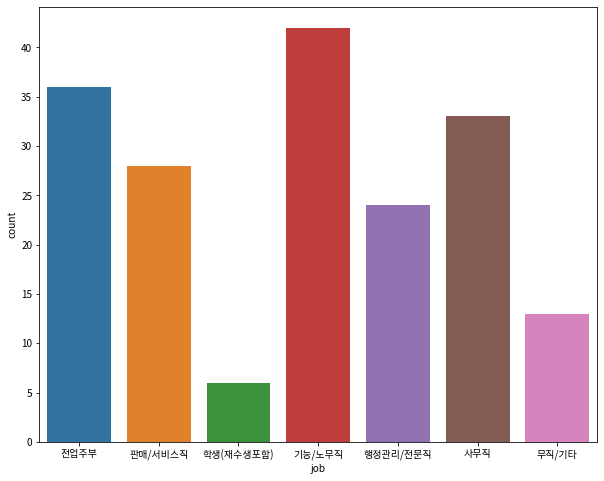

In [135]:
plt.figure(figsize = (10,8))
sns.countplot(x = alone['job'], data = alone)

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   chaju_id          1984 non-null   object
 1   credit_class      1984 non-null   object
 2   score_risk        1984 non-null   int64 
 3   gender            1984 non-null   object
 4   age               1984 non-null   int64 
 5   agegroup          1984 non-null   object
 6   job               1984 non-null   object
 7   edu               1984 non-null   object
 8   dwell_type        1984 non-null   object
 9   house_type        1984 non-null   object
 10  marriage          1984 non-null   object
 11  income_home_grp   1984 non-null   object
 12  income_ind_grp    1984 non-null   object
 13  expenditure_grp   1984 non-null   object
 14  child_cd          1984 non-null   object
 15  no_child          1984 non-null   int64 
 16  flag_priv_biz_cd  1984 non-null   object
dtypes: int64(3), o

In [12]:
df2.describe()

,score_risk,age,no_child
count,1984.000000,1984.000000,1984.000000
mean,431.570060,48.907258,1.358871
std,97.223664,14.958557,0.921663
min,185.000000,21.000000,0.000000
25%,360.000000,37.000000,0.000000
50%,428.000000,48.000000,2.000000
75%,491.000000,60.000000,2.000000
max,824.000000,85.000000,3.000000


In [14]:
df2.isnull().sum()

chaju_id            0
credit_class        0
score_risk          0
gender              0
age                 0
agegroup            0
job                 0
edu                 0
dwell_type          0
house_type          0
marriage            0
income_home_grp     0
income_ind_grp      0
expenditure_grp     0
child_cd            0
no_child            0
flag_priv_biz_cd    0
dtype: int64

### 변수확인

In [59]:
df2['credit_class'].value_counts()

C05    739
C04    657
C06    348
C03    136
C07     77
C08     18
C02      5
C09      4
Name: credit_class, dtype: int64

<AxesSubplot:xlabel='credit_class', ylabel='count'>

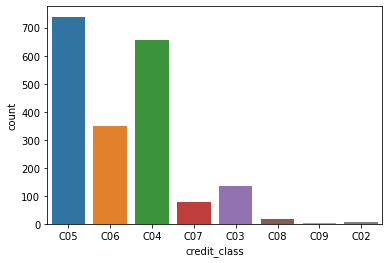

In [66]:
sns.countplot(x = df2['credit_class'],data = df2)

<AxesSubplot:>

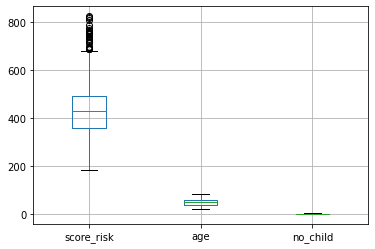

In [34]:
df2.boxplot()

In [35]:
df2['gender'].value_counts()

남성    1090
여성     894
Name: gender, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb76b6849d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb76b6920d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb76b684670>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb76b692790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb76b692af0>],
 'means': []}

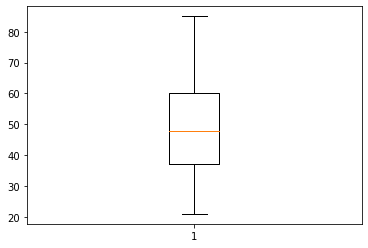

In [40]:
plt.boxplot(df2['age'])

In [78]:
df2['age'].value_counts()

49    55
43    55
53    51
52    51
47    51
      ..
79     9
84     9
23     8
85     8
83     1
Name: age, Length: 65, dtype: int64

In [77]:
df2['agegroup'].value_counts()

40대      462
50대      420
30대      372
60대      323
20대      220
70대      133
80대이상     54
Name: agegroup, dtype: int64

<AxesSubplot:xlabel='agegroup', ylabel='count'>

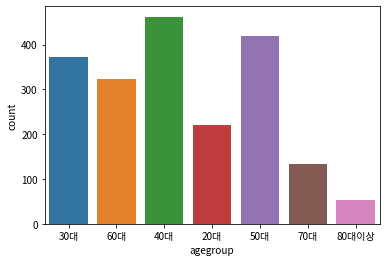

In [69]:
sns.countplot(x = df2['agegroup'],data = df2)

In [42]:
df2['job'].value_counts()

기능/노무직       435
사무직          405
판매/서비스직      364
전업주부         360
행정관리/전문직     174
무직/기타        136
학생(재수생포함)    110
Name: job, dtype: int64

In [141]:
# # 126개 처리 어떻게 할지 생각해보기

# # 136개
# df2[df2['job'] == '무직/기타']

# 126개
df2[(df2['job'] == '무직/기타') & (df2['income_ind_grp'] == '모름/무응답')]

# # 604개
# df2[df2['income_ind_grp'] == '모름/무응답']

,chaju_id,credit_class,score_risk,gender,age,agegroup,job,edu,dwell_type,house_type,marriage,income_home_grp,income_ind_grp,expenditure_grp,child_cd,no_child,flag_priv_biz_cd
3,C-1004,C05,445,남성,28,20대,무직/기타,대학교 졸업,자가,아파트,미혼,500-599만원,모름/무응답,99만원 이하,Y,0,N
6,C-1007,C05,445,남성,26,20대,무직/기타,대학교 졸업,자가,아파트,미혼,500-599만원,모름/무응답,99만원 이하,Y,0,N
18,C-1019,C07,668,남성,47,40대,무직/기타,대학교 졸업,자가,아파트,기혼,200-299만원,모름/무응답,99만원 이하,N,2,N
38,C-1039,C07,604,여성,66,60대,무직/기타,중학교 졸업,자가,아파트,기혼,200-299만원,모름/무응답,100-199만원,N,2,N
50,C-1051,C05,425,여성,28,20대,무직/기타,전문대학 졸업,자가,연립/다세대/빌라,미혼,400-499만원,모름/무응답,99만원 이하,Y,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,C-2892,C05,447,여성,73,70대,무직/기타,중학교 졸업,자가,아파트,기타(이혼/별거/사별),99만원 이하,모름/무응답,99만원 이하,N,1,N
1895,C-2910,C05,461,남성,56,50대,무직/기타,대학교 졸업,자가,아파트,기혼,300-399만원,모름/무응답,100-199만원,Y,0,Y
1908,C-2924,C06,544,남성,61,60대,무직/기타,중학교 졸업,자가,단독주택,기혼,100-199만원,모름/무응답,99만원 이하,N,3,N
1921,C-2937,C05,454,남성,61,60대,무직/기타,중학교 졸업,자가,단독주택,기혼,100-199만원,모름/무응답,99만원 이하,N,3,N


In [43]:
df2['edu'].value_counts()

대학교 졸업     719
고등학교 졸업    707
전문대학 졸업    223
중학교 졸업     146
대학교 재학      84
대학원 졸업      73
대학원 재학      16
초등학교 졸업     13
전문대학 재학      2
고등학교 재학      1
Name: edu, dtype: int64

In [44]:
df2['dwell_type'].value_counts()

자가       1550
전세        338
월세         85
사택/기타       8
영구임대        3
Name: dwell_type, dtype: int64

In [45]:
df2['house_type'].value_counts()

아파트          1190
단독주택          405
연립/다세대/빌라     355
오피스텔           19
상가주택           11
기타              4
Name: house_type, dtype: int64

In [46]:
df2['marriage'].value_counts()

기혼              1442
미혼               442
기타(이혼/별거/사별)     100
Name: marriage, dtype: int64

In [47]:
# 가족 평균 수입
df2['income_home_grp'].value_counts()

500-599만원    404
300-399만원    393
400-499만원    355
600-699만원    247
200-299만원    232
700-799만원    119
100-199만원     83
800-899만원     56
99만원 이하       54
1000만원 이상     23
900-999만원     18
Name: income_home_grp, dtype: int64

In [48]:
# 개인 평균 수입
df2['income_ind_grp'].value_counts()

모름/무응답       604
200-299만원    489
300-399만원    332
100-199만원    219
400-499만원    142
500-599만원     89
600-699만원     64
99만원 이하       24
700-799만원     13
800-899만원      4
1000만원 이상      3
900-999만원      1
Name: income_ind_grp, dtype: int64

In [49]:
# 개인 평균 지출
df2['expenditure_grp'].value_counts()

100-199만원    914
99만원 이하      867
200-299만원    150
300-399만원     41
500-599만원      6
400-499만원      6
Name: expenditure_grp, dtype: int64

In [50]:
# 자녀 유무
df2['child_cd'].value_counts()

N    1461
Y     523
Name: child_cd, dtype: int64

In [51]:
# 자녀 수
# 자녀 유무에 N,Y 구분 없이 Count
df2['no_child'].value_counts()

2    1053
0     523
1     317
3      91
Name: no_child, dtype: int64

In [52]:
# 개인사업자 여부
df2['flag_priv_biz_cd'].value_counts()

N    1802
Y     182
Name: flag_priv_biz_cd, dtype: int64

## 데이터 확인 CreDB_loan

In [145]:
df3 = pd.read_csv('./CreDB_loan.csv', encoding = 'cp949')
df3.head()

,chaju_id,com_id,check_ym,sector_cd,sector,loan_cd_1,loan_prod_1,loan_cd_2,loan_prod_2,loan_ym,loan_amt
0,C-1001,S01-01010,201905,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201810,19000000
1,C-1001,S01-01010,201901,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201810,19000000
2,C-1001,S01-01010,201902,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201810,19000000
3,C-1001,S01-01010,201812,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201810,19000000
4,C-1001,S01-01010,201904,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201810,19000000


In [6]:
df3.shape

(58775, 11)

In [4]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58775 entries, 0 to 58774
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   chaju_id     58775 non-null  object
 1   com_id       58775 non-null  object
 2   check_ym     58775 non-null  int64 
 3   sector_cd    58775 non-null  object
 4   sector       58775 non-null  object
 5   loan_cd_1    58775 non-null  object
 6   loan_prod_1  58775 non-null  object
 7   loan_cd_2    58775 non-null  object
 8   loan_prod_2  58775 non-null  object
 9   loan_ym      58775 non-null  int64 
 10  loan_amt     58775 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 4.9+ MB


In [5]:
df3.describe()

,check_ym,loan_ym,loan_amt
count,58775.000000,58775.000000,5.877500e+04
mean,201949.430949,201698.301319,3.090941e+07
std,56.949591,302.254490,7.501726e+07
min,201812.000000,199808.000000,1.000000e+04
25%,201906.000000,201608.000000,2.500000e+06
50%,201912.000000,201805.000000,8.000000e+06
75%,202006.000000,201905.000000,2.500000e+07
max,202012.000000,202012.000000,1.800000e+09


In [18]:
df3.isnull().sum()

chaju_id       0
com_id         0
check_ym       0
sector_cd      0
sector         0
loan_cd_1      0
loan_prod_1    0
loan_cd_2      0
loan_prod_2    0
loan_ym        0
loan_amt       0
dtype: int64

### 변수확인

In [7]:
df3['com_id'].value_counts()

S01-01018    1401
S01-01003    1386
S01-01011    1257
S01-01004    1245
S05-01018    1205
             ... 
S03-01161       2
S98-01024       1
S03-01045       1
S06-01013       1
S03-01112       1
Name: com_id, Length: 425, dtype: int64

In [9]:
df3['sector_cd'].value_counts()

S01    19633
S05    15553
S03     7650
S17     6799
S21     5127
S98     2696
S08      851
S06      466
Name: sector_cd, dtype: int64

In [10]:
df3['sector'].value_counts()

은행(S01)                 19633
신용카드사(S05)              15553
상호금융-농협/수협/금고 등(S03)     7650
캐피탈/할부/리스 등(S17)         6799
상호저축은행(S21)              5127
기타-장학재단/기금 등(S98)        2696
손해보험사(S08)                851
생명보험사(S06)                466
Name: sector, dtype: int64

In [11]:
df3['loan_cd_1'].value_counts()

L0031    42400
L0041     8367
L0037     8008
Name: loan_cd_1, dtype: int64

In [12]:
df3['loan_prod_1'].value_counts()

개인대출정보(카드대출 제외)    42400
단기카드대출              8367
장기카드대출              8008
Name: loan_prod_1, dtype: int64

In [13]:
df3['loan_cd_2'].value_counts()

L100    20294
L000    16375
L220     7016
L240     2772
L500     2711
L150     1722
L230     1617
L200     1608
L270     1170
L510      923
L290      862
L245      514
L210      472
L590      279
L710      196
L250      171
L700       62
L271        8
L170        3
Name: loan_cd_2, dtype: int64

In [14]:
df3['loan_prod_2'].value_counts()

신용대출                   20294
단기카드대출(현금서비스)           8367
장기카드대출(카드론)             8008
주택담보대출                  7016
지급보증(보증서)담보대출           2772
신차할부                    2711
학자금대출                   1722
주택외부동산(토지,상가 등)담보대출     1617
예·적금담보대출                1608
전세자금 대출                 1170
중고차할부                    923
기타담보대출                   862
보금자리론                    514
유가증권(주식 등)담보대출           472
기타할부                     279
운용리스                     196
학자금지급보증대출                171
금융리스                      62
전세보증금 담보대출                 8
전세자금대출                     3
Name: loan_prod_2, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f49cef97a60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f49cefa3160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f49cef97700>],
 'medians': [<matplotlib.lines.Line2D at 0x7f49cefa3820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f49cefa3b80>],
 'means': []}

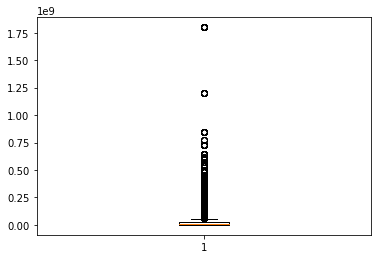

In [17]:
plt.boxplot(df3['loan_amt'])
# df3['loan_amt'].value_counts()

## 데이터 확인 CreDB_overdue

In [146]:
df4 = pd.read_csv('./CreDB_overdue.csv', encoding = 'cp949')
df4.head()

,chaju_id,com_id,check_ym,sector_cd,sector,over_type,over_reason_cd,over_reason,over_regist,over_ym,over_amt
0,C-1001,S21-01018,202001,S21,상호저축은행(S21),공공(2),R-0101,대출원금·이자연체,주채무자(0),202001,5700000
1,C-1001,S21-01018,202002,S21,상호저축은행(S21),공공(2),R-0101,대출원금·이자연체,주채무자(0),202001,5700000
2,C-1019,S01-01001,202008,S01,은행(S01),공공(2),R-0101,대출원금·이자연체,주채무자(0),202002,270000000
3,C-1019,S01-01001,202003,S01,은행(S01),공공(2),R-0101,대출원금·이자연체,주채무자(0),202002,270000000
4,C-1019,S01-01001,202006,S01,은행(S01),공공(2),R-0101,대출원금·이자연체,주채무자(0),202002,270000000


In [19]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10784 entries, 0 to 10783
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   chaju_id        10784 non-null  object
 1   com_id          10784 non-null  object
 2   check_ym        10784 non-null  int64 
 3   sector_cd       10784 non-null  object
 4   sector          10784 non-null  object
 5   over_type       10784 non-null  object
 6   over_reason_cd  10784 non-null  object
 7   over_reason     10784 non-null  object
 8   over_regist     10784 non-null  object
 9   over_ym         10784 non-null  int64 
 10  over_amt        10784 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 926.9+ KB


In [20]:
df4.describe()

,check_ym,over_ym,over_amt
count,10784.000000,10784.000000,1.078400e+04
mean,201948.755100,201723.296458,2.038326e+07
std,56.891007,196.736523,9.136425e+07
min,201812.000000,201011.000000,1.000000e+04
25%,201905.000000,201605.000000,1.600000e+06
50%,201912.000000,201801.000000,4.100000e+06
75%,202006.000000,201903.000000,1.000000e+07
max,202012.000000,202012.000000,1.500000e+09


In [21]:
df4.isnull().sum()

chaju_id          0
com_id            0
check_ym          0
sector_cd         0
sector            0
over_type         0
over_reason_cd    0
over_reason       0
over_regist       0
over_ym           0
over_amt          0
dtype: int64

In [23]:
df4.shape

(10784, 11)

### 변수확인

In [22]:
df4['com_id'].value_counts()

S05-01013    377
S05-01018    303
S05-01016    302
S05-01017    282
S05-01011    267
            ... 
S17-01085      1
S17-01018      1
S17-01001      1
S03-01006      1
S21-01034      1
Name: com_id, Length: 217, dtype: int64

In [30]:
df4['sector'].value_counts()

신용카드사(S05)              3791
기타-장학재단/기금 등(S98)       3290
은행(S01)                 1576
상호저축은행(S21)              832
캐피탈/할부/리스 등(S17)         787
상호금융-농협/수협/금고 등(S03)     473
생명보험사(S06)                18
손해보험사(S08)                17
Name: sector, dtype: int64

In [28]:
df4['sector_cd'].value_counts()

S05    3791
S98    3290
S01    1576
S21     832
S17     787
S03     473
S06      18
S08      17
Name: sector_cd, dtype: int64

In [26]:
df4['over_type'].value_counts()

공공(2)    10784
Name: over_type, dtype: int64

In [29]:
df4['over_reason_cd'].value_counts()

R-0101    3338
R-0104    2455
R-0103    1681
R-0202    1482
R-0201    1155
R-0199     483
R-9997     100
R-0299      90
Name: over_reason_cd, dtype: int64

In [31]:
df4['over_reason'].value_counts()

대출원금·이자연체                  3338
신용카드대금연체                   2455
장기카드대출(카드론)연체              1681
신용보증대지급금                   1482
지급보증대지급금                   1155
기타(0101, 0103, 0104 제외)     483
부도 정보                       100
기타(0201,0202 제외)             90
Name: over_reason, dtype: int64

In [32]:
df4['over_regist'].value_counts()

특수채권(7)    6176
주채무자(0)    4608
Name: over_regist, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f49cef1bc40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f49cef27340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f49cef1b8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f49cef27a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f49cef27d60>],
 'means': []}

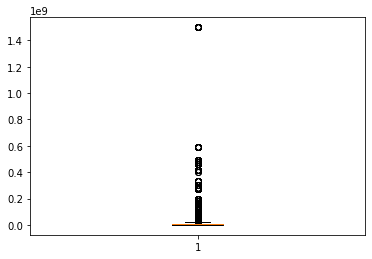

In [34]:
plt.boxplot(df4['over_amt'])
# df4['over_amt'].value_counts()

# 분석(EDA)

## 데이터 확인

In [158]:
df4['com_id'].equals(df1['com_id'])

False

In [163]:
def GetDifferences(df1, df2):
    df = pd.concat([df1, df2]).reset_index(drop=True)
    idx = [diff[0] for diff in df.groupby(list(df)).groups.values() if len(diff) == 1]
    return df.reindex(idx)

In [161]:
GetDifferences(df4['com_id'], df1['com_id'])

3528     S17-01001
443      S17-01018
10748    S17-01085
10414    S21-01034
4944     S98-01009
Name: com_id, dtype: object

In [173]:
df4[df4['com_id'] == 'S98-01009']

,chaju_id,com_id,check_ym,sector_cd,sector,over_type,over_reason_cd,over_reason,over_regist,over_ym,over_amt
4944,C-1812,S98-01009,202012,S98,기타-장학재단/기금 등(S98),공공(2),R-0199,"기타(0101, 0103, 0104 제외)",주채무자(0),202012,5000000


In [174]:
df3[df3['com_id'] == 'S98-01009']

,chaju_id,com_id,check_ym,sector_cd,sector,loan_cd_1,loan_prod_1,loan_cd_2,loan_prod_2,loan_ym,loan_amt
24359,C-1812,S98-01009,202012,S98,기타-장학재단/기금 등(S98),L0031,개인대출정보(카드대출 제외),L590,기타할부,201806,5900000
24360,C-1812,S98-01009,202011,S98,기타-장학재단/기금 등(S98),L0031,개인대출정보(카드대출 제외),L590,기타할부,201806,5900000
24361,C-1812,S98-01009,202010,S98,기타-장학재단/기금 등(S98),L0031,개인대출정보(카드대출 제외),L590,기타할부,201806,5900000
24362,C-1812,S98-01009,202009,S98,기타-장학재단/기금 등(S98),L0031,개인대출정보(카드대출 제외),L590,기타할부,201806,5900000
24363,C-1812,S98-01009,202008,S98,기타-장학재단/기금 등(S98),L0031,개인대출정보(카드대출 제외),L590,기타할부,201806,5900000
24364,C-1812,S98-01009,202007,S98,기타-장학재단/기금 등(S98),L0031,개인대출정보(카드대출 제외),L590,기타할부,201806,5900000
24365,C-1812,S98-01009,202006,S98,기타-장학재단/기금 등(S98),L0031,개인대출정보(카드대출 제외),L590,기타할부,201806,5900000
24366,C-1812,S98-01009,202005,S98,기타-장학재단/기금 등(S98),L0031,개인대출정보(카드대출 제외),L590,기타할부,201806,5900000
24367,C-1812,S98-01009,202004,S98,기타-장학재단/기금 등(S98),L0031,개인대출정보(카드대출 제외),L590,기타할부,201806,5900000
24368,C-1812,S98-01009,202003,S98,기타-장학재단/기금 등(S98),L0031,개인대출정보(카드대출 제외),L590,기타할부,201806,5900000


In [162]:
df3['com_id'].equals(df1['com_id'])

False

In [164]:
GetDifferences(df3['com_id'], df1['com_id'])

46055    S06-01013
16354    S98-01024
Name: com_id, dtype: object

In [175]:
df4[df4['com_id'] == 'S06-01013']

,chaju_id,com_id,check_ym,sector_cd,sector,over_type,over_reason_cd,over_reason,over_regist,over_ym,over_amt


In [55]:
df3[df3['chaju_id'] == 'C-C-102']

,chaju_id,com_id,sector_cd,sector,check_ym,card_cd,card_type,card_ym,flag_priv_biz_cd


In [58]:
df = pd.concat([df1['chaju_id'], df2['chaju_id']]).reset_index(drop=True)

In [ ]:
df.drop

## data merge 분석

In [82]:
df1.shape

(96828, 9)

In [83]:
df2.shape

(1984, 17)

In [84]:
df3.shape

(58775, 11)

In [85]:
df4.shape

(10784, 11)

In [104]:
df1

,chaju_id,com_id,sector_cd,sector,check_ym,card_cd,card_type,card_ym,flag_priv_biz_cd
0,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),202008,신용카드(0081),개인카드(1),200206,N
1,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),202011,신용카드(0081),개인카드(1),200206,N
2,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),201903,신용카드(0081),개인카드(1),200206,N
3,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),202002,신용카드(0081),개인카드(1),200206,N
4,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),201904,신용카드(0081),개인카드(1),200206,N
...,...,...,...,...,...,...,...,...,...
96823,C-3000,S05-01017,S05,신용카드사(S05),201904,신용카드(0081),개인카드(1),201506,N
96824,C-3000,S05-01017,S05,신용카드사(S05),201903,신용카드(0081),개인카드(1),201506,N
96825,C-3000,S05-01017,S05,신용카드사(S05),201902,신용카드(0081),개인카드(1),201506,N
96826,C-3000,S05-01017,S05,신용카드사(S05),201901,신용카드(0081),개인카드(1),201506,N


In [97]:
# 열 안에 있는 값이 같은지 확인
def fn_get_dataframe_compare(pkCol, df1, df2):

    # index 지정
    df1.set_index(pkCol, inplace=True)
    df2.set_index(pkCol, inplace=True)

    # union index, columns
    union_index = np.union1d(df1.index, df2.index)    # index 값 union all
    union_columns = np.union1d(df1.columns, df2.columns)

    # reindex
    new = df1.reindex(index=union_index, columns=union_columns)
    old = df2.reindex(index=union_index, columns=union_columns)

    # dataframe compare
    df_diff = new.compare(old)


    return df_diff


In [105]:
# chaju와 card 열 값 확인
pkCol = ['chaju_id']
df_diff = fn_get_dataframe_compare(pkCol, df1, df2)

ValueError: cannot reindex from a duplicate axis

In [110]:
df1['chaju_id'].unqiue()

AttributeError: 'Series' object has no attribute 'unqiue'

In [112]:
df2

,credit_class,score_risk,gender,age,agegroup,job,edu,dwell_type,house_type,marriage,income_home_grp,income_ind_grp,expenditure_grp,child_cd,no_child,flag_priv_biz_cd
chaju_id,,,,,,,,,,,,,,,,
C-1001,C05,478,남성,30,30대,기능/노무직,대학교 졸업,자가,아파트,미혼,900-999만원,300-399만원,100-199만원,Y,0,N
C-1002,C05,484,여성,66,60대,전업주부,초등학교 졸업,자가,아파트,기혼,200-299만원,모름/무응답,99만원 이하,N,3,Y
C-1003,C05,478,남성,43,40대,판매/서비스직,대학교 졸업,자가,아파트,기혼,500-599만원,500-599만원,100-199만원,N,2,N
C-1004,C05,445,남성,28,20대,무직/기타,대학교 졸업,자가,아파트,미혼,500-599만원,모름/무응답,99만원 이하,Y,0,N
C-1005,C05,421,남성,52,50대,행정관리/전문직,대학교 졸업,자가,아파트,기혼,500-599만원,500-599만원,200-299만원,N,2,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C-2996,C05,448,남성,41,40대,사무직,대학교 졸업,자가,단독주택,미혼,300-399만원,300-399만원,100-199만원,Y,0,N
C-2997,C04,308,남성,37,30대,사무직,대학교 졸업,자가,아파트,기혼,300-399만원,300-399만원,100-199만원,N,2,N
C-2998,C04,371,여성,50,50대,기능/노무직,고등학교 졸업,자가,아파트,기혼,500-599만원,100-199만원,100-199만원,N,2,N


In [74]:
df1_2 = pd.merge(df1, df2, how = 'inner',on ='chaju_id' )
df1_2_3 = pd.merge(df1_2, df3, how = 'inner',on ='chaju_id' )
df1_2_3_4 = pd.merge(df1_2_3, df4, how = 'inner',on ='chaju_id' )

In [75]:
df1_2_3_4

,chaju_id,com_id_x,sector_cd_x,sector_x,check_ym_x,card_cd,card_type,card_ym,flag_priv_biz_cd_x,credit_class,...,com_id,check_ym,sector_cd,sector,over_type,over_reason_cd,over_reason,over_regist,over_ym,over_amt
0,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),202008,신용카드(0081),개인카드(1),200206,N,C05,...,S21-01018,202001,S21,상호저축은행(S21),공공(2),R-0101,대출원금·이자연체,주채무자(0),202001,5700000
1,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),202008,신용카드(0081),개인카드(1),200206,N,C05,...,S21-01018,202002,S21,상호저축은행(S21),공공(2),R-0101,대출원금·이자연체,주채무자(0),202001,5700000
2,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),202008,신용카드(0081),개인카드(1),200206,N,C05,...,S21-01018,202001,S21,상호저축은행(S21),공공(2),R-0101,대출원금·이자연체,주채무자(0),202001,5700000
3,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),202008,신용카드(0081),개인카드(1),200206,N,C05,...,S21-01018,202002,S21,상호저축은행(S21),공공(2),R-0101,대출원금·이자연체,주채무자(0),202001,5700000
4,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),202008,신용카드(0081),개인카드(1),200206,N,C05,...,S21-01018,202001,S21,상호저축은행(S21),공공(2),R-0101,대출원금·이자연체,주채무자(0),202001,5700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40717311,C-2987,S03-01055,S03,상호금융-농협/수협/금고 등(S03),201812,신용카드(0081),개인카드(1),201308,N,C06,...,S17-01085,201812,S17,캐피탈/할부/리스 등(S17),공공(2),R-0101,대출원금·이자연체,특수채권(7),201807,630000
40717312,C-2987,S03-01055,S03,상호금융-농협/수협/금고 등(S03),201812,신용카드(0081),개인카드(1),201308,N,C06,...,S21-01019,201903,S21,상호저축은행(S21),공공(2),R-0101,대출원금·이자연체,주채무자(0),201810,9600000
40717313,C-2987,S03-01055,S03,상호금융-농협/수협/금고 등(S03),201812,신용카드(0081),개인카드(1),201308,N,C06,...,S21-01019,201902,S21,상호저축은행(S21),공공(2),R-0101,대출원금·이자연체,주채무자(0),201810,9600000
40717314,C-2987,S03-01055,S03,상호금융-농협/수협/금고 등(S03),201812,신용카드(0081),개인카드(1),201308,N,C06,...,S21-01019,201901,S21,상호저축은행(S21),공공(2),R-0101,대출원금·이자연체,주채무자(0),201810,9600000


In [79]:
df1_2_3_4[df1_2_3_4['chaju_id'] == 'C-1001']

,chaju_id,com_id_x,sector_cd_x,sector_x,check_ym_x,card_cd,card_type,card_ym,flag_priv_biz_cd_x,credit_class,...,com_id,check_ym,sector_cd,sector,over_type,over_reason_cd,over_reason,over_regist,over_ym,over_amt
0,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),202008,신용카드(0081),개인카드(1),200206,N,C05,...,S21-01018,202001,S21,상호저축은행(S21),공공(2),R-0101,대출원금·이자연체,주채무자(0),202001,5700000
1,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),202008,신용카드(0081),개인카드(1),200206,N,C05,...,S21-01018,202002,S21,상호저축은행(S21),공공(2),R-0101,대출원금·이자연체,주채무자(0),202001,5700000
2,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),202008,신용카드(0081),개인카드(1),200206,N,C05,...,S21-01018,202001,S21,상호저축은행(S21),공공(2),R-0101,대출원금·이자연체,주채무자(0),202001,5700000
3,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),202008,신용카드(0081),개인카드(1),200206,N,C05,...,S21-01018,202002,S21,상호저축은행(S21),공공(2),R-0101,대출원금·이자연체,주채무자(0),202001,5700000
4,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),202008,신용카드(0081),개인카드(1),200206,N,C05,...,S21-01018,202001,S21,상호저축은행(S21),공공(2),R-0101,대출원금·이자연체,주채무자(0),202001,5700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15637,C-1001,S05-01016,S05,신용카드사(S05),201906,신용카드(0081),개인카드(1),201711,N,C05,...,S21-01018,202002,S21,상호저축은행(S21),공공(2),R-0101,대출원금·이자연체,주채무자(0),202001,5700000
15638,C-1001,S05-01016,S05,신용카드사(S05),201906,신용카드(0081),개인카드(1),201711,N,C05,...,S21-01018,202001,S21,상호저축은행(S21),공공(2),R-0101,대출원금·이자연체,주채무자(0),202001,5700000
15639,C-1001,S05-01016,S05,신용카드사(S05),201906,신용카드(0081),개인카드(1),201711,N,C05,...,S21-01018,202002,S21,상호저축은행(S21),공공(2),R-0101,대출원금·이자연체,주채무자(0),202001,5700000
15640,C-1001,S05-01016,S05,신용카드사(S05),201906,신용카드(0081),개인카드(1),201711,N,C05,...,S21-01018,202001,S21,상호저축은행(S21),공공(2),R-0101,대출원금·이자연체,주채무자(0),202001,5700000


In [92]:
# chaju와 loan겹치는게 C101
df23_m = pd.merge(df2, df3, how = 'inner', on = 'chaju_id')
df23_m
# df1_2 = pd.merge(df1, df2, how = 'inner',on ='chaju_id' )

,chaju_id,credit_class,score_risk,gender,age,agegroup,job,edu,dwell_type,house_type,marriage,income_home_grp,income_ind_grp,expenditure_grp,child_cd,no_child,flag_priv_biz_cd,com_id,check_ym,sector_cd,sector,loan_cd_1,loan_prod_1,loan_cd_2,loan_prod_2,loan_ym,loan_amt
0,C-1001,C05,478,남성,30,30대,기능/노무직,대학교 졸업,자가,아파트,미혼,900-999만원,300-399만원,100-199만원,Y,0,N,S01-01010,201905,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201810,19000000
1,C-1001,C05,478,남성,30,30대,기능/노무직,대학교 졸업,자가,아파트,미혼,900-999만원,300-399만원,100-199만원,Y,0,N,S01-01010,201901,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201810,19000000
2,C-1001,C05,478,남성,30,30대,기능/노무직,대학교 졸업,자가,아파트,미혼,900-999만원,300-399만원,100-199만원,Y,0,N,S01-01010,201902,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201810,19000000
3,C-1001,C05,478,남성,30,30대,기능/노무직,대학교 졸업,자가,아파트,미혼,900-999만원,300-399만원,100-199만원,Y,0,N,S01-01010,201812,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201810,19000000
4,C-1001,C05,478,남성,30,30대,기능/노무직,대학교 졸업,자가,아파트,미혼,900-999만원,300-399만원,100-199만원,Y,0,N,S01-01010,201904,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201810,19000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58770,C-3000,C06,571,여성,59,50대,전업주부,고등학교 졸업,자가,아파트,기타(이혼/별거/사별),99만원 이하,모름/무응답,99만원 이하,N,1,N,S08-01028,201902,S08,손해보험사(S08),L0031,개인대출정보(카드대출 제외),L100,신용대출,201705,15000000
58771,C-3000,C06,571,여성,59,50대,전업주부,고등학교 졸업,자가,아파트,기타(이혼/별거/사별),99만원 이하,모름/무응답,99만원 이하,N,1,N,S08-01028,201901,S08,손해보험사(S08),L0031,개인대출정보(카드대출 제외),L100,신용대출,201705,15000000
58772,C-3000,C06,571,여성,59,50대,전업주부,고등학교 졸업,자가,아파트,기타(이혼/별거/사별),99만원 이하,모름/무응답,99만원 이하,N,1,N,S08-01028,201901,S08,손해보험사(S08),L0031,개인대출정보(카드대출 제외),L100,신용대출,201812,3600000
58773,C-3000,C06,571,여성,59,50대,전업주부,고등학교 졸업,자가,아파트,기타(이혼/별거/사별),99만원 이하,모름/무응답,99만원 이하,N,1,N,S08-01028,201812,S08,손해보험사(S08),L0031,개인대출정보(카드대출 제외),L100,신용대출,201705,15000000


In [94]:
df23_m[(df23_m['sector_cd'] == 'S05') & (df23_m['loan_cd_1'] == 'L0031')]

,chaju_id,credit_class,score_risk,gender,age,agegroup,job,edu,dwell_type,house_type,marriage,income_home_grp,income_ind_grp,expenditure_grp,child_cd,no_child,flag_priv_biz_cd,com_id,check_ym,sector_cd,sector,loan_cd_1,loan_prod_1,loan_cd_2,loan_prod_2,loan_ym,loan_amt
477,C-1015,C06,518,남성,42,40대,판매/서비스직,전문대학 졸업,전세,아파트,기혼,500-599만원,200-299만원,200-299만원,Y,0,N,S05-01014,202004,S05,신용카드사(S05),L0031,개인대출정보(카드대출 제외),L590,기타할부,201907,680000
478,C-1015,C06,518,남성,42,40대,판매/서비스직,전문대학 졸업,전세,아파트,기혼,500-599만원,200-299만원,200-299만원,Y,0,N,S05-01014,202011,S05,신용카드사(S05),L0031,개인대출정보(카드대출 제외),L590,기타할부,201907,680000
479,C-1015,C06,518,남성,42,40대,판매/서비스직,전문대학 졸업,전세,아파트,기혼,500-599만원,200-299만원,200-299만원,Y,0,N,S05-01014,202003,S05,신용카드사(S05),L0031,개인대출정보(카드대출 제외),L590,기타할부,201907,680000
480,C-1015,C06,518,남성,42,40대,판매/서비스직,전문대학 졸업,전세,아파트,기혼,500-599만원,200-299만원,200-299만원,Y,0,N,S05-01014,202012,S05,신용카드사(S05),L0031,개인대출정보(카드대출 제외),L590,기타할부,201907,680000
481,C-1015,C06,518,남성,42,40대,판매/서비스직,전문대학 졸업,전세,아파트,기혼,500-599만원,200-299만원,200-299만원,Y,0,N,S05-01014,202001,S05,신용카드사(S05),L0031,개인대출정보(카드대출 제외),L590,기타할부,201907,680000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57477,C-2961,C05,458,남성,35,30대,판매/서비스직,대학교 졸업,자가,단독주택,미혼,400-499만원,300-399만원,99만원 이하,Y,0,N,S05-01007,201904,S05,신용카드사(S05),L0031,개인대출정보(카드대출 제외),L100,신용대출,201801,7200000
57478,C-2961,C05,458,남성,35,30대,판매/서비스직,대학교 졸업,자가,단독주택,미혼,400-499만원,300-399만원,99만원 이하,Y,0,N,S05-01007,201903,S05,신용카드사(S05),L0031,개인대출정보(카드대출 제외),L100,신용대출,201801,7200000
57479,C-2961,C05,458,남성,35,30대,판매/서비스직,대학교 졸업,자가,단독주택,미혼,400-499만원,300-399만원,99만원 이하,Y,0,N,S05-01007,201902,S05,신용카드사(S05),L0031,개인대출정보(카드대출 제외),L100,신용대출,201801,7200000
57480,C-2961,C05,458,남성,35,30대,판매/서비스직,대학교 졸업,자가,단독주택,미혼,400-499만원,300-399만원,99만원 이하,Y,0,N,S05-01007,201901,S05,신용카드사(S05),L0031,개인대출정보(카드대출 제외),L100,신용대출,201801,7200000


## card + loan + card merge 

In [122]:
df13 = pd.merge(df1, df3, how = 'inner',on ='chaju_id' )
df13.head()

,chaju_id,com_id_x,sector_cd_x,sector_x,check_ym_x,card_cd,card_type,card_ym,flag_priv_biz_cd,com_id_y,check_ym_y,sector_cd_y,sector_y,loan_cd_1,loan_prod_1,loan_cd_2,loan_prod_2,loan_ym,loan_amt
0,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),202008,신용카드(0081),개인카드(1),200206,N,S01-01010,201905,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201810,19000000
1,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),202008,신용카드(0081),개인카드(1),200206,N,S01-01010,201901,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201810,19000000
2,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),202008,신용카드(0081),개인카드(1),200206,N,S01-01010,201902,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201810,19000000
3,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),202008,신용카드(0081),개인카드(1),200206,N,S01-01010,201812,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201810,19000000
4,C-1001,S03-01003,S03,상호금융-농협/수협/금고 등(S03),202008,신용카드(0081),개인카드(1),200206,N,S01-01010,201904,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201810,19000000


In [102]:
# 187558개
df13[df13['flag_priv_biz_cd'] == 'Y']

# 187558개 
df13[df13['card_type'] == '개인기업카드(2)']

# 개인사업자는 모두 개인기업카드 

,chaju_id,com_id_x,sector_cd_x,sector_x,check_ym_x,card_cd,card_type,card_ym,flag_priv_biz_cd,com_id_y,check_ym_y,sector_cd_y,sector_y,loan_cd_1,loan_prod_1,loan_cd_2,loan_prod_2,loan_ym,loan_amt
7971,C-1002,S03-01077,S03,상호금융-농협/수협/금고 등(S03),202009,신용카드(0081),개인기업카드(2),201902,Y,S05-01001,202003,S05,신용카드사(S05),L0037,장기카드대출,L000,장기카드대출(카드론),201912,2800000
7972,C-1002,S03-01077,S03,상호금융-농협/수협/금고 등(S03),202009,신용카드(0081),개인기업카드(2),201902,Y,S05-01001,201912,S05,신용카드사(S05),L0037,장기카드대출,L000,장기카드대출(카드론),201912,2800000
7973,C-1002,S03-01077,S03,상호금융-농협/수협/금고 등(S03),202009,신용카드(0081),개인기업카드(2),201902,Y,S05-01001,202004,S05,신용카드사(S05),L0037,장기카드대출,L000,장기카드대출(카드론),201912,2800000
7974,C-1002,S03-01077,S03,상호금융-농협/수협/금고 등(S03),202009,신용카드(0081),개인기업카드(2),201902,Y,S05-01001,202002,S05,신용카드사(S05),L0037,장기카드대출,L000,장기카드대출(카드론),201912,2800000
7975,C-1002,S03-01077,S03,상호금융-농협/수협/금고 등(S03),202009,신용카드(0081),개인기업카드(2),201902,Y,S05-01001,202001,S05,신용카드사(S05),L0037,장기카드대출,L000,장기카드대출(카드론),201912,2800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3921110,C-2995,S05-01009,S05,신용카드사(S05),201905,신용카드(0081),개인기업카드(2),201905,Y,S08-01013,201903,S08,손해보험사(S08),L0031,개인대출정보(카드대출 제외),L100,신용대출,201801,4200000
3921111,C-2995,S05-01009,S05,신용카드사(S05),201905,신용카드(0081),개인기업카드(2),201905,Y,S08-01013,201902,S08,손해보험사(S08),L0031,개인대출정보(카드대출 제외),L100,신용대출,201801,4200000
3921112,C-2995,S05-01009,S05,신용카드사(S05),201905,신용카드(0081),개인기업카드(2),201905,Y,S08-01013,201901,S08,손해보험사(S08),L0031,개인대출정보(카드대출 제외),L100,신용대출,201801,4200000
3921113,C-2995,S05-01009,S05,신용카드사(S05),201905,신용카드(0081),개인기업카드(2),201905,Y,S08-01013,201812,S08,손해보험사(S08),L0031,개인대출정보(카드대출 제외),L100,신용대출,201801,4200000


In [112]:
# 개인사업자이면서 주택담보대출 받은 사람 -> 개인사업자는 주택담보대출 한도가 없음 
alone_home = df13[(df13['flag_priv_biz_cd'] == 'Y') & (df13['loan_cd_2'] == 'L220')]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f49a4ccbe20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f49a4c95520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f49a4ccbac0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f49a4c95be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f49a4c95f40>],
 'means': []}

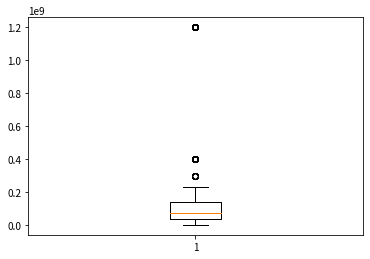

In [124]:
# 개인사업자 주택담보대출 분포도
plt.boxplot(alone_home['loan_amt'])

In [107]:
pd.options.display.float_format = '{:.5f}'.format

In [115]:
# 개인사업자 : 3000000 ~ 1200000000(12억)
alone_home['loan_amt'].describe()

count        16770.00000
mean     109095193.79845
std      143670540.48673
min        3000000.00000
25%       40000000.00000
50%       75000000.00000
75%      140000000.00000
max     1200000000.00000
Name: loan_amt, dtype: float64

In [116]:
# 전체 : 2100000 ~ 1200000000(12억)
home = df13[df13['loan_cd_2'] == 'L220']
home['loan_amt'].describe()

count       491298.00000
mean     113801909.63529
std      102249860.92717
min        2100000.00000
25%       45000000.00000
50%       86000000.00000
75%      150000000.00000
max     1200000000.00000
Name: loan_amt, dtype: float64

In [118]:
# 주택담보대출이 제한없는 개인사업자보다 더 큰 담보대출을 한 사람들은?(75%기준)
# 136938
nalone_ = df13[(df13['loan_cd_2'] == 'L220') & (df13['loan_amt'] > 140000000)]
nalone_

,chaju_id,com_id_x,sector_cd_x,sector_x,check_ym_x,card_cd,card_type,card_ym,flag_priv_biz_cd,com_id_y,check_ym_y,sector_cd_y,sector_y,loan_cd_1,loan_prod_1,loan_cd_2,loan_prod_2,loan_ym,loan_amt
12667,C-1005,S01-01003,S01,은행(S01),201906,신용카드(0081),개인카드(1),200803,N,S01-01003,201901,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201506,200000000
12669,C-1005,S01-01003,S01,은행(S01),201906,신용카드(0081),개인카드(1),200803,N,S01-01003,201812,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201506,200000000
12707,C-1005,S01-01003,S01,은행(S01),202010,신용카드(0081),개인카드(1),200803,N,S01-01003,201901,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201506,200000000
12709,C-1005,S01-01003,S01,은행(S01),202010,신용카드(0081),개인카드(1),200803,N,S01-01003,201812,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201506,200000000
12747,C-1005,S01-01003,S01,은행(S01),202011,신용카드(0081),개인카드(1),200803,N,S01-01003,201901,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201506,200000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849358,C-2957,S05-01010,S05,신용카드사(S05),201812,신용카드(0081),개인카드(1),201706,N,S01-01004,201904,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201807,260000000
3849359,C-2957,S05-01010,S05,신용카드사(S05),201812,신용카드(0081),개인카드(1),201706,N,S01-01004,201903,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201807,260000000
3849360,C-2957,S05-01010,S05,신용카드사(S05),201812,신용카드(0081),개인카드(1),201706,N,S01-01004,201902,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201807,260000000
3849361,C-2957,S05-01010,S05,신용카드사(S05),201812,신용카드(0081),개인카드(1),201706,N,S01-01004,201901,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201807,260000000


In [120]:
# 123939(10000명은 고객 특성이 없는것으로 예상)
feature = pd.merge(nalone_, df2, on = ['chaju_id','flag_priv_biz_cd'], how = 'inner')
feature

,chaju_id,com_id_x,sector_cd_x,sector_x,check_ym_x,card_cd,card_type,card_ym,flag_priv_biz_cd,com_id_y,check_ym_y,sector_cd_y,sector_y,loan_cd_1,loan_prod_1,loan_cd_2,loan_prod_2,loan_ym,loan_amt,credit_class,score_risk,gender,age,agegroup,job,edu,dwell_type,house_type,marriage,income_home_grp,income_ind_grp,expenditure_grp,child_cd,no_child
0,C-1005,S01-01003,S01,은행(S01),201906,신용카드(0081),개인카드(1),200803,N,S01-01003,201901,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201506,200000000,C05,421,남성,52,50대,행정관리/전문직,대학교 졸업,자가,아파트,기혼,500-599만원,500-599만원,200-299만원,N,2
1,C-1005,S01-01003,S01,은행(S01),201906,신용카드(0081),개인카드(1),200803,N,S01-01003,201812,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201506,200000000,C05,421,남성,52,50대,행정관리/전문직,대학교 졸업,자가,아파트,기혼,500-599만원,500-599만원,200-299만원,N,2
2,C-1005,S01-01003,S01,은행(S01),202010,신용카드(0081),개인카드(1),200803,N,S01-01003,201901,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201506,200000000,C05,421,남성,52,50대,행정관리/전문직,대학교 졸업,자가,아파트,기혼,500-599만원,500-599만원,200-299만원,N,2
3,C-1005,S01-01003,S01,은행(S01),202010,신용카드(0081),개인카드(1),200803,N,S01-01003,201812,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201506,200000000,C05,421,남성,52,50대,행정관리/전문직,대학교 졸업,자가,아파트,기혼,500-599만원,500-599만원,200-299만원,N,2
4,C-1005,S01-01003,S01,은행(S01),202011,신용카드(0081),개인카드(1),200803,N,S01-01003,201901,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201506,200000000,C05,421,남성,52,50대,행정관리/전문직,대학교 졸업,자가,아파트,기혼,500-599만원,500-599만원,200-299만원,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123934,C-2957,S05-01010,S05,신용카드사(S05),201812,신용카드(0081),개인카드(1),201706,N,S01-01004,201904,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201807,260000000,C05,408,여성,48,40대,전업주부,대학교 졸업,자가,아파트,기혼,400-499만원,모름/무응답,100-199만원,N,2
123935,C-2957,S05-01010,S05,신용카드사(S05),201812,신용카드(0081),개인카드(1),201706,N,S01-01004,201903,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201807,260000000,C05,408,여성,48,40대,전업주부,대학교 졸업,자가,아파트,기혼,400-499만원,모름/무응답,100-199만원,N,2
123936,C-2957,S05-01010,S05,신용카드사(S05),201812,신용카드(0081),개인카드(1),201706,N,S01-01004,201902,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201807,260000000,C05,408,여성,48,40대,전업주부,대학교 졸업,자가,아파트,기혼,400-499만원,모름/무응답,100-199만원,N,2
123937,C-2957,S05-01010,S05,신용카드사(S05),201812,신용카드(0081),개인카드(1),201706,N,S01-01004,201901,S01,은행(S01),L0031,개인대출정보(카드대출 제외),L220,주택담보대출,201807,260000000,C05,408,여성,48,40대,전업주부,대학교 졸업,자가,아파트,기혼,400-499만원,모름/무응답,100-199만원,N,2


In [125]:
feature['job'].value_counts()

사무직          34204
전업주부         27659
기능/노무직       26439
판매/서비스직      20009
행정관리/전문직      8035
무직/기타         5939
학생(재수생포함)     1654
Name: job, dtype: int64